In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# for hiding warning
import warnings
warnings.filterwarnings('ignore')

In [261]:
data = pd.read_csv(r'C:\Users\user\Downloads\cargoflash\data\kc_house_data.csv')
pd.set_option('max_columns', None)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


    Variables Description Data Type
    id a notation for a house Numeric
    date Date house was sold String
    price Price is prediction target Numeric
    bedrooms Number of Bedrooms/House Numeric
    bathrooms Number of bathrooms/bedrooms Numeric
    sqftliving square footage of the home Numeric sqftlot square footage of the lot Numeric
    floors Total floors (levels) in house Numeric
    waterfront House which has a view to a waterfront Numeric
    view Has been viewed Numeric

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [263]:
data.drop('id',inplace=True,axis=1)
data.drop('date',inplace=True,axis=1)
data.drop('yr_built',inplace=True,axis=1)
data.drop('yr_renovated',inplace=True,axis=1)
data.drop('zipcode',inplace=True,axis=1)

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


In [265]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [266]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503


In [268]:
data.describe(percentiles = [.25,.5,.75,.90,.95,.99])
#data["price"].max()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000
90%,8.870000e+05,4.000000,3.000000,3254.000000,2.137160e+04,2.000000,0.000000,0.000000,4.000000,9.000000,2950.000000,970.000000,47.727900,-122.022000,2930.000000,17822.000000
95%,1.160000e+06,5.000000,3.500000,3760.000000,4.330720e+04,2.000000,0.000000,2.000000,5.000000,10.000000,3400.000000,1190.000000,47.749700,-121.979800,3300.000000,37045.200000
99%,1.970000e+06,6.000000,4.250000,4980.000000,2.130080e+05,3.000000,0.000000,4.000000,5.000000,11.000000,4370.000000,1660.000000,47.772700,-121.783000,4080.000000,157687.000000


(21573, 16)

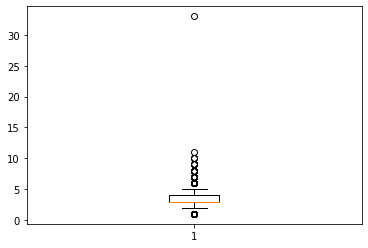

In [180]:
#outlier treatment
plt.boxplot(data['bedrooms'])
Q1 = data['bedrooms'].quantile(0.1)
Q3 = data['bedrooms'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['bedrooms'] >= Q1 - 1.5*IQR) & (data['bedrooms'] <= Q3 + 1.5*IQR)]
data.shape

(21564, 16)

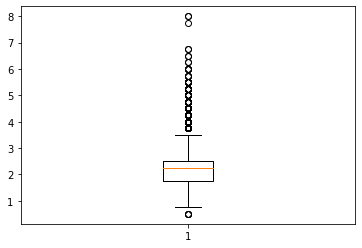

In [181]:
#outlier treatment
plt.boxplot(data['bathrooms'])
Q1 = data['bathrooms'].quantile(0.1)
Q3 = data['bathrooms'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['bathrooms'] >= Q1 - 1.5*IQR) & (data['bathrooms'] <= Q3 + 1.5*IQR)]
data.shape

(21529, 16)

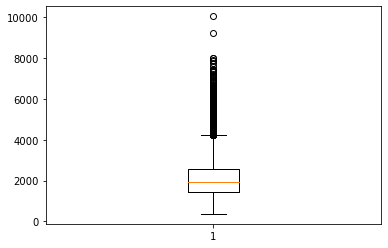

In [182]:
#outlier treatment
plt.boxplot(data['sqft_living'])
Q1 = data['sqft_living'].quantile(0.1)
Q3 = data['sqft_living'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_living'] >= Q1 - 1.5*IQR) & (data['sqft_living'] <= Q3 + 1.5*IQR)]
data.shape

(20610, 16)

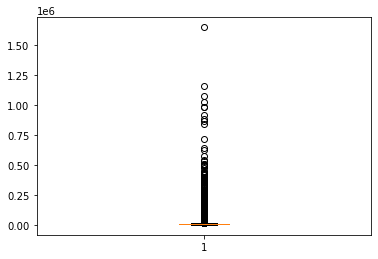

In [183]:
#outlier treatment
plt.boxplot(data['sqft_lot'])
Q1 = data['sqft_lot'].quantile(0.1)
Q3 = data['sqft_lot'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_lot'] >= Q1 - 1.5*IQR) & (data['sqft_lot'] <= Q3 + 1.5*IQR)]
data.shape

(20605, 16)

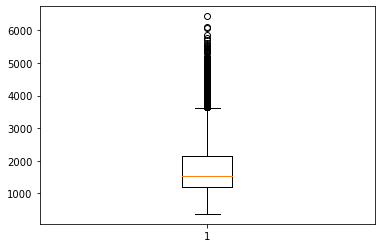

In [184]:
#outlier treatment
plt.boxplot(data['sqft_above'])
Q1 = data['sqft_above'].quantile(0.1)
Q3 = data['sqft_above'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_above'] >= Q1 - 1.5*IQR) & (data['sqft_above'] <= Q3 + 1.5*IQR)]
data.shape

(20599, 16)

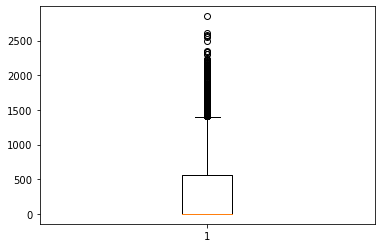

In [185]:
 #outlier treatment
plt.boxplot(data['sqft_basement'])
Q1 = data['sqft_basement'].quantile(0.1)
Q3 = data['sqft_basement'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_basement'] >= Q1 - 1.5*IQR) & (data['sqft_basement'] <= Q3 + 1.5*IQR)]
data.shape

(20591, 16)

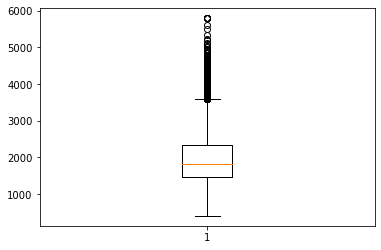

In [186]:
#outlier treatment
plt.boxplot(data['sqft_living15'])
Q1 = data['sqft_living15'].quantile(0.1)
Q3 = data['sqft_living15'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_living15'] >= Q1 - 1.5*IQR) & (data['sqft_living15'] <= Q3 + 1.5*IQR)]
data.shape

(19931, 16)

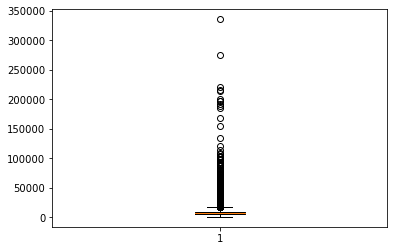

In [187]:
#outlier treatment
plt.boxplot(data['sqft_lot15'])
Q1 = data['sqft_lot15'].quantile(0.1)
Q3 = data['sqft_lot15'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_lot15'] >= Q1 - 1.5*IQR) & (data['sqft_lot15'] <= Q3 + 1.5*IQR)]
data.shape

(19693, 16)

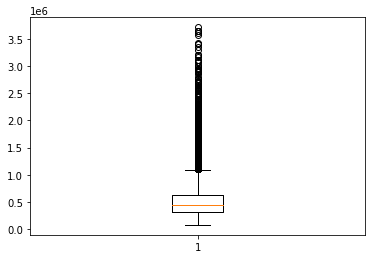

In [188]:
#outlier treatment
plt.boxplot(data['price'])
Q1 = data['price'].quantile(0.1)
Q3 = data['price'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['price'] >= Q1 - 1.5*IQR) & (data['price'] <= Q3 + 1.5*IQR)]
data.shape

In [189]:
data.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,1.969300e+04,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000
mean,5.031112e+05,3.341543,2.067169,1985.972325,8097.269131,1.484715,0.003910,0.204895,3.411263,7.562484,1704.879653,281.092673,47.561394,-122.225533,1920.664195,7644.634540
std,2.677297e+05,0.881421,0.727944,799.575154,5360.742282,0.542590,0.062409,0.706397,0.651962,1.076694,731.543417,418.064528,0.137101,0.133831,631.825857,4058.653746
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.512000,460.000000,651.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,47.476900,-122.334000,1460.000000,5000.000000
50%,4.390000e+05,3.000000,2.250000,1850.000000,7272.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,47.571900,-122.258000,1790.000000,7350.000000
75%,6.200000e+05,4.000000,2.500000,2440.000000,9668.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,550.000000,47.678900,-122.148000,2260.000000,9395.000000
90%,8.399000e+05,4.000000,3.000000,3080.000000,13481.000000,2.000000,0.000000,0.000000,4.000000,9.000000,2770.000000,930.000000,47.726300,-122.033000,2800.000000,12050.600000
95%,1.010000e+06,5.000000,3.250000,3490.000000,17675.200000,2.000000,0.000000,2.000000,5.000000,10.000000,3180.000000,1120.000000,47.747640,-121.997000,3140.000000,15060.600000
99%,1.490000e+06,6.000000,4.000000,4340.000000,30086.120000,3.000000,0.000000,4.000000,5.000000,11.000000,3920.000000,1540.000000,47.772800,-121.841000,3860.000000,22673.200000


In [190]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503


In [191]:
data['bathrooms'] = np.round(data['bathrooms'])
data['floors'] = np.round(data['floors'])

<AxesSubplot:>

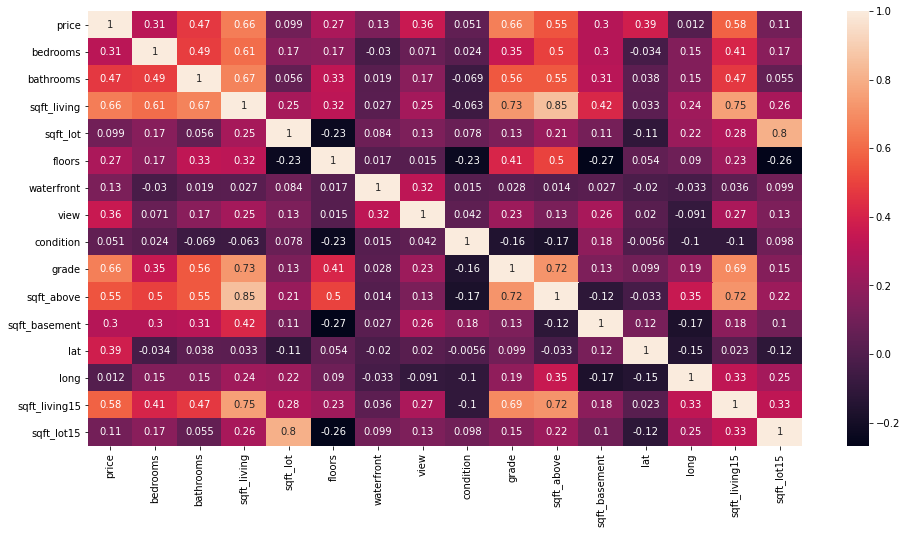

In [192]:
plt.figure(figsize= (16,8))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

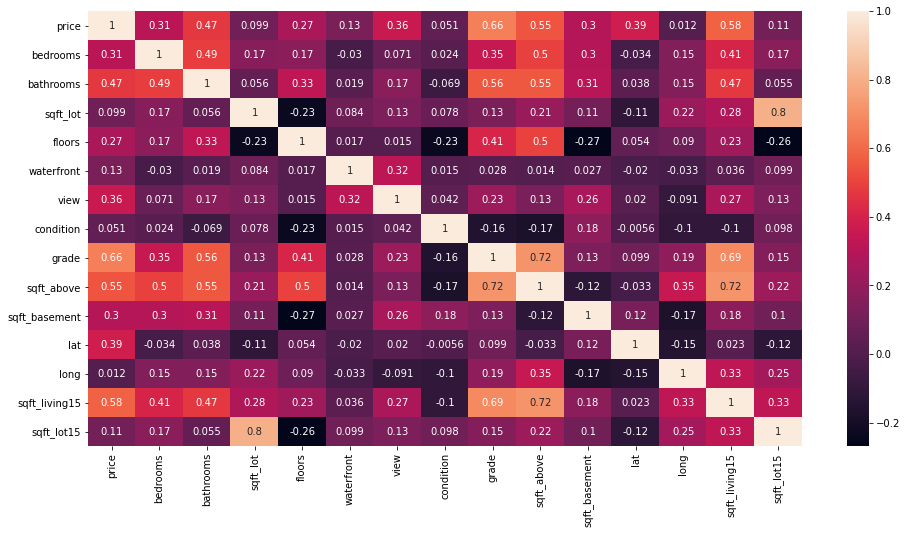

In [193]:
data1 = data.drop('sqft_living',axis=1)
plt.figure(figsize= (16,8))
sns.heatmap(data1.corr(),annot=True)

<AxesSubplot:>

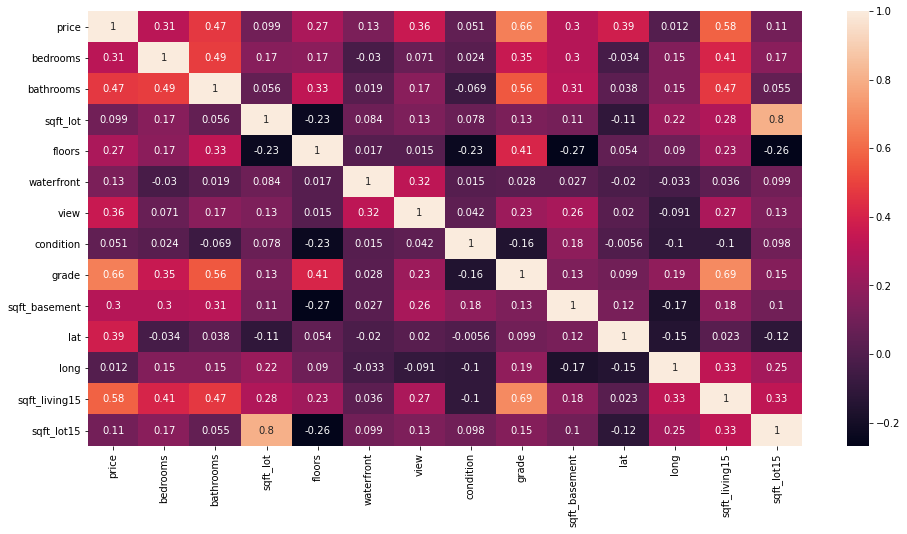

In [196]:
data2 = data1.drop('sqft_above',axis=1)
plt.figure(figsize= (16,8))
sns.heatmap(data2.corr(),annot=True)

<AxesSubplot:>

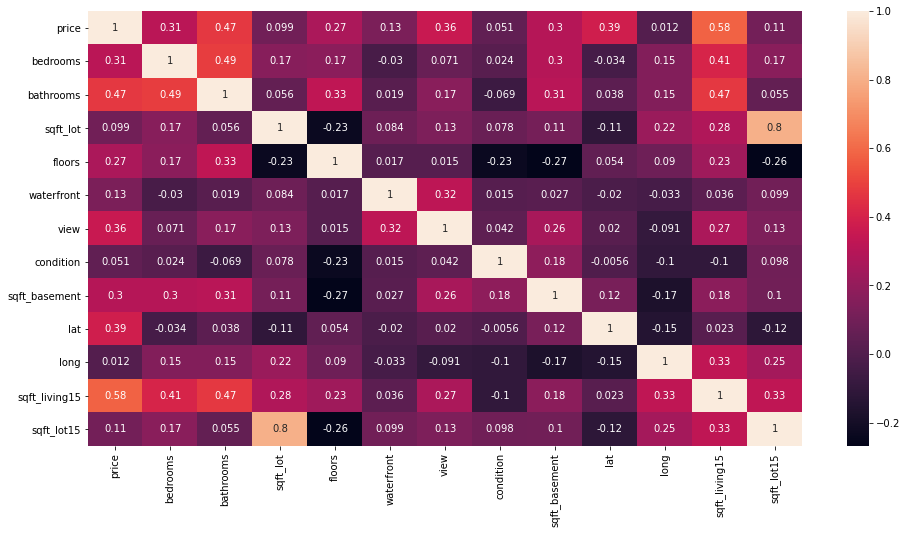

In [197]:
data3 = data2.drop('grade',axis=1)
plt.figure(figsize= (16,8))
sns.heatmap(data3.corr(),annot=True)

# model

In [198]:
data = data3
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [199]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [200]:
num_vars = data.columns

num_vars = list(num_vars)

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head(10)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,lat,long,sqft_living15,sqft_lot15
1017,-0.822274,0.747352,-0.021047,7.204805,-0.945487,-0.062126,-0.286388,2.442239,-0.670638,-0.588252,-0.552194,-0.611296,0.826960
14847,-0.478145,-0.384514,-0.021047,-0.145118,-0.945487,-0.062126,-0.286388,-0.636946,0.478085,-0.232281,-0.305312,0.131571,-0.399803
2599,-0.453831,-1.516381,-1.443281,-0.955716,-0.945487,-0.062126,-0.286388,2.442239,-0.670638,0.907115,-0.716782,-0.943216,-1.157943
16496,-0.927009,-1.516381,-1.443281,-0.049710,0.841153,-0.062126,-0.286388,-0.636946,-0.670638,-0.446739,-0.163168,-1.038050,0.030791
13556,-0.085576,-0.384514,-0.021047,-0.384377,0.841153,-0.062126,-0.286388,-0.636946,-0.670638,-0.763319,0.809398,0.036737,-1.021527
13896,0.718826,0.747352,-0.021047,0.353370,0.841153,-0.062126,-0.286388,-0.636946,-0.670638,-0.007611,1.572489,1.253775,0.093846
19493,0.831042,-0.384514,-0.021047,-0.324470,-0.945487,-0.062126,-0.286388,2.442239,1.507148,0.880855,-0.327756,-0.105514,-0.291848
8667,-0.459442,-0.384514,-0.021047,0.794909,-0.945487,-0.062126,-0.286388,0.902647,-0.670638,-0.451845,3.353033,-0.974827,0.973190
3852,0.120340,0.747352,-0.021047,2.942696,0.841153,-0.062126,3.984641,-0.636946,-0.670638,-2.546817,1.654783,0.874439,2.301284
3152,0.737528,0.747352,-0.021047,-0.636765,0.841153,-0.062126,-0.286388,2.442239,1.052446,0.878667,-0.918777,-0.627102,-0.734709


In [201]:
num_vars = data.columns

num_vars = list(num_vars)

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head(10)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,lat,long,sqft_living15,sqft_lot15
19015,-0.081054,-1.53548,-0.016324,-1.317117,0.865361,-0.063866,-0.29855,-0.616781,-0.341943,0.814317,-1.125271,-0.793715,-1.599089
6634,-0.572474,-0.39454,-1.414029,0.316309,-0.932934,-0.063866,-0.29855,0.904063,-0.676463,1.453927,-0.782472,-0.587258,0.440547
9893,-0.795847,-0.39454,-0.016324,-0.138405,0.865361,-0.063866,-0.29855,0.904063,-0.676463,-1.533350,1.244519,0.111518,-0.066189
3467,-0.486848,1.88734,-0.016324,-0.463146,0.865361,-0.063866,-0.29855,-0.616781,-0.676463,-1.373630,0.350258,0.651481,-0.423094
2169,-0.600396,-0.39454,-0.016324,0.616466,-0.932934,-0.063866,-0.29855,-0.616781,-0.676463,-2.531053,1.721458,-1.349560,1.298961
9257,-0.583643,-1.53548,-0.016324,-1.226403,0.865361,-0.063866,-0.29855,-0.616781,0.016472,-0.093681,-1.117819,-0.587258,-1.473899
21042,-0.758618,-0.39454,1.381381,-1.315974,0.865361,-0.063866,-0.29855,-0.616781,0.016472,-0.053569,-0.663237,-0.730190,-1.602076
12092,3.448234,1.88734,2.779085,-0.865262,0.865361,-0.063866,-0.29855,-0.616781,1.928018,0.540094,-1.043298,-0.190227,-1.015447
16680,2.033540,-0.39454,-0.016324,-0.911572,0.865361,-0.063866,-0.29855,0.904063,0.828879,0.561244,-0.611072,0.016230,-1.075927
13619,0.640253,0.74640,-0.016324,0.406642,0.865361,-0.063866,-0.29855,-0.616781,-0.676463,0.100317,1.535153,0.540312,-0.116962


In [202]:
y_train = df_train.pop('price')
X_train = df_train
y_test = df_test.pop('price')
X_test = df_test

In [203]:


lm = LinearRegression()
lm.fit(X_train, y_train)
y_pre=lm.predict(X_test)
print('Coefficients: \n', lm.coef_) 

Coefficients: 
 [ 0.01606532  0.1550908   0.02212527  0.14780219  0.0526865   0.14136348
  0.11080954  0.09258855  0.33954309 -0.08365183  0.44478595 -0.01442732]


In [204]:
print('Variance score: ',lm.score(X_test, y_test))

Variance score:  0.6080448909903892


In [205]:
data = {'Actual':y_test,'Predicted':y_pre}
df1=pd.DataFrame(data)
df1

,Actual,Predicted
19015,-0.081054,-0.033349
6634,-0.572474,-0.072990
9893,-0.795847,-0.466241
3467,-0.486848,-0.230935
2169,-0.600396,-1.932078
...,...,...
11470,2.331371,1.019124
2698,0.283788,0.183467
7225,-0.479402,-0.423694
17869,-0.464511,-0.502914


In [250]:
import statsmodels.api as sm  
lm0 = sm.OLS(y_train,sm.add_constant(X_train)).fit()
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1670.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:54:49   Log-Likelihood:                -13370.
No. Observations:               13785   AIC:                         2.677e+04
Df Residuals:                   13772   BIC:                         2.686e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.105e-15      0.005  -1.49e-12

In [236]:

    X_train_p = X_train.drop('sqft_lot15',axis =1)
    X_train_p = X_train_p.drop('floors',axis =1)
    lm = sm.OLS(y_train,sm.add_constant(X_train_p)).fit()
    print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1888.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:44:29   Log-Likelihood:                -13610.
No. Observations:               13785   AIC:                         2.724e+04
Df Residuals:                   13774   BIC:                         2.733e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.377e-15      0.006  -1.51e-12

# RFE

In [247]:
lm = LinearRegression()
lm.fit(X_train, y_train)
x=11
rfe = RFE(lm, x)    
rfe = rfe.fit(X_train, y_train)
column = X_train.columns[rfe.support_] 
X_train_rfe = X_train[column]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print("for RFE ",x," R square is ",lm.rsquared)

for RFE  11  R square is  0.5925562264180854


# VFE

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,sqft_lot15,3.06
2,sqft_lot,2.77
10,sqft_living15,1.80
1,bathrooms,1.75
3,floors,1.63
7,sqft_basement,1.61
0,bedrooms,1.49
5,view,1.32
9,long,1.30
4,waterfront,1.15


In [209]:
X_train_vif = X_train.drop('sqft_lot15',axis=1)
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bathrooms,1.75
10,sqft_living15,1.73
7,sqft_basement,1.61
3,floors,1.56
0,bedrooms,1.49
5,view,1.32
9,long,1.29
2,sqft_lot,1.27
4,waterfront,1.14
6,condition,1.10


In [246]:
lm1 = sm.OLS(y_train,X_train_vif).fit()
print("R square is ",lm1.rsquared)

R square is  0.5925562264180854


# Ridge Regression

In [211]:
#list of alpha for tuning
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,20,30,40,50,100,500,1000]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [212]:
#Checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1000}
-0.4497453638832446


In [213]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005286,0.001095,0.001988,0.000446,0.001,{'alpha': 0.001},-0.446006,-0.445262,-0.442752,-0.454144,-0.447744,-0.456582,-0.455486,-0.433034,-0.457955,-0.467257,-0.450622,0.009120,29,-0.451050,-0.451222,-0.451073,-0.449143,-0.450120,-0.449540,-0.449329,-0.452626,-0.448745,-0.448004,-0.450085,0.001324
1,0.005087,0.001040,0.002191,0.000747,0.001,{'alpha': 0.001},-0.446006,-0.445262,-0.442752,-0.454144,-0.447744,-0.456582,-0.455486,-0.433034,-0.457955,-0.467257,-0.450622,0.009120,29,-0.451050,-0.451222,-0.451073,-0.449143,-0.450120,-0.449540,-0.449329,-0.452626,-0.448745,-0.448004,-0.450085,0.001324
2,0.009076,0.003105,0.002790,0.001882,0.01,{'alpha': 0.01},-0.446006,-0.445261,-0.442752,-0.454144,-0.447744,-0.456582,-0.455486,-0.433034,-0.457955,-0.467257,-0.450622,0.009120,28,-0.451050,-0.451222,-0.451073,-0.449143,-0.450120,-0.449540,-0.449329,-0.452626,-0.448745,-0.448004,-0.450085,0.001324
3,0.005785,0.001828,0.002194,0.000749,0.05,{'alpha': 0.05},-0.446005,-0.445261,-0.442752,-0.454144,-0.447744,-0.456582,-0.455486,-0.433034,-0.457955,-0.467257,-0.450622,0.009120,27,-0.451050,-0.451222,-0.451073,-0.449143,-0.450120,-0.449540,-0.449328,-0.452626,-0.448745,-0.448003,-0.450085,0.001324
4,0.006184,0.001532,0.002193,0.000746,0.1,{'alpha': 0.1},-0.446005,-0.445261,-0.442752,-0.454144,-0.447744,-0.456581,-0.455486,-0.433033,-0.457955,-0.467256,-0.450622,0.009120,26,-0.451050,-0.451222,-0.451072,-0.449143,-0.450120,-0.449540,-0.449328,-0.452626,-0.448745,-0.448003,-0.450085,0.001324
5,0.006582,0.002570,0.002292,0.000897,0.2,{'alpha': 0.2},-0.446005,-0.445261,-0.442752,-0.454143,-0.447743,-0.456581,-0.455486,-0.433033,-0.457955,-0.467256,-0.450622,0.009120,25,-0.451049,-0.451222,-0.451072,-0.449143,-0.450119,-0.449540,-0.449328,-0.452625,-0.448745,-0.448003,-0.450085,0.001324
6,0.006085,0.001041,0.002092,0.000697,0.3,{'alpha': 0.3},-0.446005,-0.445261,-0.442752,-0.454143,-0.447743,-0.456581,-0.455485,-0.433032,-0.457955,-0.467256,-0.450621,0.009120,24,-0.451049,-0.451221,-0.451072,-0.449142,-0.450119,-0.449539,-0.449328,-0.452625,-0.448745,-0.448003,-0.450084,0.001324
7,0.006783,0.001656,0.003190,0.002352,0.4,{'alpha': 0.4},-0.446005,-0.445260,-0.442752,-0.454143,-0.447742,-0.456580,-0.455485,-0.433032,-0.457955,-0.467256,-0.450621,0.009120,23,-0.451049,-0.451221,-0.451072,-0.449142,-0.450119,-0.449539,-0.449327,-0.452625,-0.448744,-0.448003,-0.450084,0.001324
8,0.009577,0.002454,0.003689,0.001484,0.5,{'alpha': 0.5},-0.446005,-0.445260,-0.442751,-0.454143,-0.447742,-0.456580,-0.455485,-0.433031,-0.457955,-0.467256,-0.450621,0.009120,22,-0.451049,-0.451221,-0.451071,-0.449142,-0.450119,-0.449539,-0.449327,-0.452624,-0.448744,-0.448002,-0.450084,0.001324
9,0.007180,0.001395,0.002293,0.000779,0.6,{'alpha': 0.6},-0.446004,-0.445259,-0.442751,-0.454142,-0.447741,-0.456580,-0.455485,-0.433031,-0.457954,-0.467255,-0.450620,0.009120,21,-0.451048,-0.451220,-0.451071,-0.449142,-0.450118,-0.449539,-0.449327,-0.452624,-0.448744,-0.448002,-0.450084,0.001324


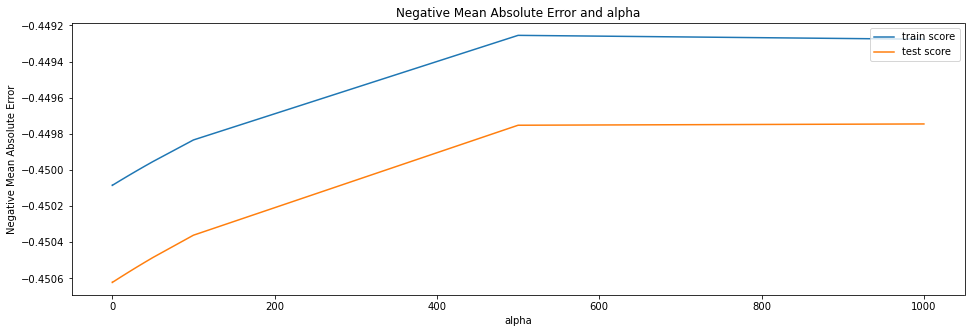

In [214]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [215]:
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
ridge.coef_

array([ 0.02690786,  0.15592512,  0.01706334,  0.14411289,  0.04989248,
        0.14260656,  0.0987881 ,  0.09404704,  0.31977263, -0.07166685,
        0.40400353, -0.00373397])

In [216]:
# lets check the R-squared value of test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test,y_pred= y_test_pred))

0.6071609426895889


# Checking Ridge Regression by using R-squared scoring metric

In [217]:
#list of alpha for tuning
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,20,30,40,50,100,500,1000]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [218]:
#Checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 40}
0.590547474877983


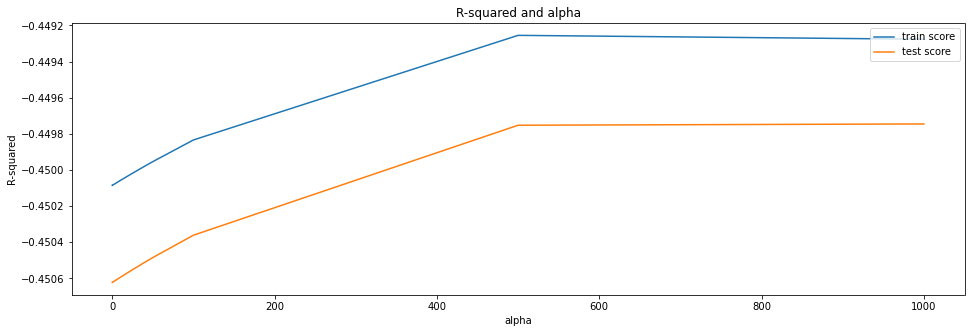

In [219]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title("R-squared and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [220]:
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
ridge.coef_

array([ 0.01656693,  0.1551599 ,  0.02181531,  0.14768429,  0.0525517 ,
        0.14146898,  0.11027186,  0.09267763,  0.33871334, -0.08309712,
        0.44291779, -0.01383923])

In [221]:
# lets check the R-squared value of test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test,y_pred= y_test_pred))

0.6080860910737554


# Lasso Regression

In [222]:
#list of alpha for tuning
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,20,30,40,50,100,500,1000]}

lasso = Lasso()

# cross validation
model_cv_lasso_neg_mean = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso_neg_mean.fit(X_train, y_train) 

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [223]:
#Checking the value of optimum number of parameters
print(model_cv_lasso_neg_mean.best_params_)
print(model_cv_lasso_neg_mean.best_score_)

{'alpha': 0.01}
-0.4491253274002311


In [224]:
cv_results = pd.DataFrame(model_cv_lasso_neg_mean.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007778,0.001532,0.002295,0.000457,0.001,{'alpha': 0.001},-0.445810,-0.445218,-0.442628,-0.453993,-0.447570,-0.456575,-0.455415,-0.432804,-0.457689,-0.467082,-0.450478,0.009130,2,-0.450900,-0.451073,-0.450932,-0.448995,-0.449978,-0.449387,-0.449166,-0.452482,-0.448610,-0.447855,-0.449938,0.001325
1,0.010171,0.001933,0.002694,0.001265,0.001,{'alpha': 0.001},-0.445810,-0.445218,-0.442628,-0.453993,-0.447570,-0.456575,-0.455415,-0.432804,-0.457689,-0.467082,-0.450478,0.009130,2,-0.450900,-0.451073,-0.450932,-0.448995,-0.449978,-0.449387,-0.449166,-0.452482,-0.448610,-0.447855,-0.449938,0.001325
2,0.009674,0.001842,0.002894,0.001135,0.01,{'alpha': 0.01},-0.444216,-0.443726,-0.441022,-0.453061,-0.445934,-0.456204,-0.454484,-0.430541,-0.456184,-0.465881,-0.449125,0.009483,1,-0.449571,-0.449692,-0.449578,-0.447761,-0.448745,-0.447888,-0.447733,-0.451120,-0.447416,-0.446727,-0.448623,0.001278
3,0.007382,0.001561,0.002191,0.000394,0.05,{'alpha': 0.05},-0.446948,-0.444169,-0.443941,-0.456580,-0.449321,-0.461819,-0.462154,-0.429859,-0.463291,-0.471842,-0.452992,0.011752,4,-0.453437,-0.453479,-0.453317,-0.451749,-0.452718,-0.451747,-0.451245,-0.454732,-0.451390,-0.451326,-0.452514,0.001133
4,0.006083,0.000300,0.001994,0.000446,0.1,{'alpha': 0.1},-0.468970,-0.465301,-0.466067,-0.484000,-0.478201,-0.484244,-0.489689,-0.453402,-0.494479,-0.499816,-0.478417,0.013956,5,-0.478872,-0.479527,-0.479087,-0.477371,-0.478706,-0.477626,-0.476181,-0.480571,-0.476980,-0.476098,-0.478102,0.001406
5,0.009875,0.002692,0.003198,0.000755,0.2,{'alpha': 0.2},-0.520319,-0.524846,-0.523596,-0.543488,-0.538806,-0.532010,-0.548623,-0.512440,-0.551305,-0.555499,-0.535093,0.013873,6,-0.535609,-0.537380,-0.535811,-0.534580,-0.536045,-0.534120,-0.532759,-0.536645,-0.533005,-0.533207,-0.534916,0.001536
6,0.011072,0.001808,0.003192,0.001076,0.3,{'alpha': 0.3},-0.587253,-0.600133,-0.592520,-0.611680,-0.616438,-0.599290,-0.615626,-0.585626,-0.617704,-0.627307,-0.605358,0.013596,7,-0.606050,-0.606895,-0.605847,-0.604941,-0.607635,-0.604633,-0.602586,-0.606335,-0.602728,-0.604094,-0.605174,0.001606
7,0.006984,0.001337,0.002491,0.000808,0.4,{'alpha': 0.4},-0.652359,-0.670581,-0.654209,-0.676889,-0.689043,-0.663250,-0.675605,-0.650474,-0.681321,-0.694817,-0.670855,0.014717,8,-0.672147,-0.671798,-0.671669,-0.671865,-0.672201,-0.670901,-0.668435,-0.670659,-0.668138,-0.668824,-0.670664,0.001519
8,0.006783,0.001074,0.002591,0.000661,0.5,{'alpha': 0.5},-0.691334,-0.710555,-0.692728,-0.716612,-0.733596,-0.702209,-0.711379,-0.685953,-0.719153,-0.733746,-0.709726,0.015923,9,-0.710958,-0.710413,-0.710072,-0.711288,-0.711642,-0.709596,-0.707191,-0.709134,-0.706891,-0.707754,-0.709494,0.001625
9,0.007182,0.001533,0.002391,0.000799,0.6,{'alpha': 0.6},-0.727808,-0.746011,-0.730188,-0.749930,-0.767334,-0.738331,-0.746145,-0.722738,-0.754372,-0.768805,-0.745166,0.014949,10,-0.747023,-0.746408,-0.747520,-0.743426,-0.741710,-0.746464,-0.744457,-0.748383,-0.742444,-0.742578,-0.745041,0.002280


In [225]:

#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [226]:
#Checking the value of optimum number of parameters
print(model_cv1.best_params_)
print(model_cv1.best_score_)

{'alpha': 0.001}
0.5905242584655086


In [227]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009777,0.001939,0.002790,0.000598,0.001,{'alpha': 0.001},0.590279,0.601803,0.591489,0.601350,0.621394,0.565451,0.580979,0.571510,0.598044,0.582943,0.590524,0.015472,1,0.592825,0.591400,0.592631,0.591375,0.589013,0.595500,0.593796,0.594607,0.591696,0.593674,0.592652,0.001780
1,0.008878,0.002160,0.002191,0.000393,0.001,{'alpha': 0.001},0.590279,0.601803,0.591489,0.601350,0.621394,0.565451,0.580979,0.571510,0.598044,0.582943,0.590524,0.015472,1,0.592825,0.591400,0.592631,0.591375,0.589013,0.595500,0.593796,0.594607,0.591696,0.593674,0.592652,0.001780
2,0.007579,0.001197,0.002295,0.000779,0.01,{'alpha': 0.01},0.589971,0.601457,0.591227,0.599928,0.621107,0.564333,0.580225,0.572722,0.595934,0.580989,0.589789,0.015388,3,0.591944,0.590628,0.591825,0.590501,0.588174,0.594663,0.592924,0.593769,0.590784,0.592788,0.591800,0.001777
3,0.006979,0.000772,0.002193,0.000598,0.05,{'alpha': 0.05},0.573931,0.588876,0.578431,0.582093,0.608748,0.545502,0.561802,0.565504,0.571826,0.557771,0.573448,0.016769,4,0.575643,0.574265,0.575599,0.573866,0.571582,0.578092,0.576619,0.577645,0.574193,0.575951,0.575345,0.001839
4,0.007079,0.000830,0.002194,0.000400,0.1,{'alpha': 0.1},0.533831,0.551902,0.537480,0.538478,0.568807,0.503265,0.518978,0.529120,0.521475,0.513378,0.531671,0.018128,5,0.534042,0.531639,0.533353,0.530967,0.527859,0.536390,0.535001,0.534716,0.531578,0.535338,0.533088,0.002439
5,0.006876,0.001037,0.002094,0.000299,0.2,{'alpha': 0.2},0.447755,0.453475,0.445011,0.441910,0.475040,0.419645,0.426801,0.439599,0.421300,0.427562,0.439810,0.016097,6,0.442695,0.438604,0.441731,0.437851,0.434483,0.446060,0.442917,0.443674,0.440698,0.442424,0.441114,0.003162
6,0.007181,0.001073,0.002394,0.000798,0.3,{'alpha': 0.3},0.321200,0.318294,0.313702,0.313735,0.335655,0.300218,0.299818,0.307883,0.292833,0.301650,0.310499,0.012024,7,0.313880,0.311188,0.314156,0.308859,0.300760,0.316340,0.315025,0.315746,0.312971,0.310901,0.311983,0.004350
7,0.007679,0.001260,0.002696,0.000460,0.4,{'alpha': 0.4},0.184130,0.178567,0.177012,0.178342,0.189307,0.171649,0.170447,0.172446,0.164688,0.169974,0.175656,0.006941,8,0.178136,0.177226,0.180390,0.170844,0.166637,0.180332,0.180805,0.184221,0.178325,0.176470,0.177339,0.004866
8,0.006583,0.000914,0.002493,0.000806,0.5,{'alpha': 0.5},0.091881,0.086407,0.089478,0.081230,0.083361,0.086165,0.086147,0.089968,0.079027,0.082341,0.085601,0.003909,9,0.088392,0.087831,0.091699,0.079322,0.074383,0.090466,0.091358,0.095786,0.088081,0.085927,0.087324,0.005936
9,0.006782,0.001657,0.002193,0.000399,0.6,{'alpha': 0.6},-0.000006,-0.003846,-0.001238,-0.001900,-0.001221,-0.000779,-0.000398,-0.001407,-0.004153,-0.000045,-0.001499,0.001376,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


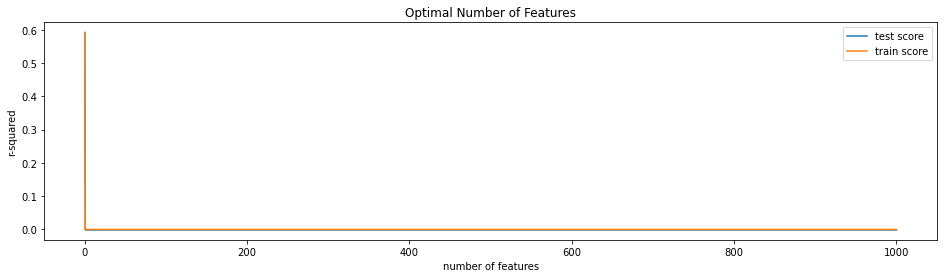

In [228]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

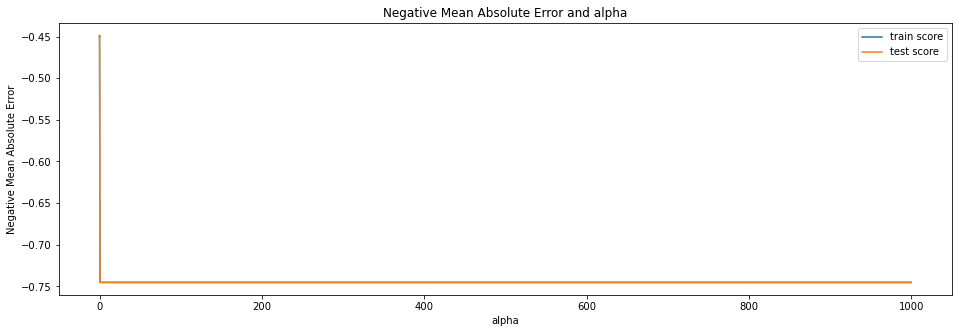

In [229]:


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [230]:
# fitting lasso with alpha 0.001

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [231]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.6079963050039576


In [232]:
# if i is the ridge regression alpha
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
ridge.coef_

array([ 0.01656693,  0.1551599 ,  0.02181531,  0.14768429,  0.0525517 ,
        0.14146898,  0.11027186,  0.09267763,  0.33871334, -0.08309712,
        0.44291779, -0.01383923])

In [233]:
# if i is the ridge regression alpha
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
lasso.coef_

array([ 0.01553636,  0.15510334,  0.01722913,  0.14700786,  0.05168172,
        0.14122249,  0.10959904,  0.09226413,  0.3388036 , -0.08265115,
        0.44352816, -0.00928571])

In [256]:
coef = pd.DataFrame(index = X_test.columns)
coef.rows = X.columns
coef["ridge"] = ridge.coef_
coef["lasso"] = lasso.coef_
#coef["RFE"] = lm.params
#coef["VIF"] = lm1.params
#coef["all"] = lm0.params
c= coef.transpose()

In [257]:
c

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,lat,long,sqft_living15,sqft_lot15
ridge,0.016567,0.155160,0.021815,0.147684,0.052552,0.141469,0.110272,0.092678,0.338713,-0.083097,0.442918,-0.013839
lasso,0.015536,0.155103,0.017229,0.147008,0.051682,0.141222,0.109599,0.092264,0.338804,-0.082651,0.443528,-0.009286
